### Разделение на тестовую и трейновую выборку по параметру Healthcare_1

In [40]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# !conda install -c conda-forge lightgbm
from lightgbm import LGBMRegressor


# 4. Метирки качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

In [4]:
train = pd.read_csv('First_blood.csv')

In [5]:
healthcare_1_test = train[train['Healthcare_1'].isna()]

In [6]:
healthcare_1_train = train[train['Healthcare_1'].notna()]

In [7]:
train.shape

(10000, 23)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Social_1       10000 non-null  int64  
 11  Social_2       10000 non-null  int64  
 12  Social_3       10000 non-null  int64  
 13  Healthcare_1   5202 non-null   float64
 14  Healthcare_2   10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Price          10000 non-null  float64
 17  Ecology_2_A    10000 non-null  int64  
 18  Ecology

In [9]:
healthcare_1_train.shape

(5202, 23)

In [10]:
healthcare_1_train.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Healthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,0,0,1.0,109.144492,84.613939,15.0,6,15.0,2011,0.319809,...,2857.0,5,8,289034.391871,0,1,0,1,0,1
2,5,5,3.0,57.607965,38.955672,5.0,3,9.0,1974,0.150818,...,2643.0,4,5,258091.883679,0,1,0,1,0,1
3,6,6,1.0,42.466813,40.010160,1.0,14,17.0,2014,0.243205,...,540.0,0,0,127196.762031,0,1,0,1,0,1
4,10,6,3.0,75.888156,78.324716,1.0,11,17.0,2014,0.243205,...,540.0,0,0,218500.747041,0,1,0,1,0,1
9,19,16,3.0,64.080930,44.551320,6.0,5,9.0,1980,0.037178,...,2300.0,1,7,258719.288708,0,1,0,1,0,1
10,20,6,1.0,41.132439,24.216388,10.0,24,25.0,2016,0.243205,...,540.0,0,0,135481.816381,0,1,0,1,0,1
11,21,1,2.0,51.122649,33.397882,8.0,6,14.0,1990,0.025609,...,240.0,3,1,119191.507153,0,1,0,1,0,1
12,22,17,3.0,73.885956,53.325842,7.0,5,9.0,1963,0.000000,...,46.0,1,1,473609.972908,0,1,0,1,0,1
14,24,19,1.0,40.598373,20.678203,10.0,3,16.0,1985,0.309479,...,990.0,0,6,187656.177472,0,1,0,1,0,1
15,26,20,2.0,54.904566,32.999142,8.0,15,23.0,2010,0.019509,...,176.0,5,5,391080.562804,0,1,0,1,0,1


In [11]:
X = healthcare_1_train.drop('Healthcare_1', axis=1)

In [12]:
y = healthcare_1_train['Healthcare_1']

In [13]:
healthcare_1_test.shape

(4798, 23)

In [14]:
healthcare_1_test.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Healthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
1,2,2,1.0,34.472263,16.069376,5.0,5,18.0,1969,0.000000,...,NaN,2,5,174548.966339,0,1,0,1,0,1
5,11,9,3.0,76.367456,45.673463,10.0,14,14.0,1996,0.069753,...,NaN,1,11,307799.672369,0,1,0,1,0,1
6,14,12,2.0,57.639461,34.425481,8.0,17,17.0,1990,0.090799,...,NaN,5,15,236258.547739,0,1,0,1,0,1
7,15,13,1.0,46.833812,21.755192,9.0,6,25.0,2001,0.090799,...,NaN,5,15,213389.219992,0,1,0,1,0,1
8,17,9,2.0,60.150857,30.065036,11.0,6,14.0,1999,0.310199,...,NaN,0,0,206431.593416,0,1,0,1,0,1
13,23,18,1.0,39.747451,19.235542,7.0,3,17.0,1989,0.000000,...,NaN,0,5,164329.930869,0,1,0,1,1,0
18,32,25,3.0,88.406762,NaN,1.0,21,25.0,2019,0.069753,...,NaN,1,11,323536.766838,0,1,0,1,0,1
27,42,2,2.0,46.739501,29.418831,5.0,3,5.0,1964,0.000000,...,NaN,2,5,146622.854984,0,1,0,1,0,1
28,43,31,1.0,39.432842,20.151696,8.0,4,14.0,1976,0.000000,...,NaN,0,4,279522.908090,0,1,0,1,0,1
31,46,25,2.0,54.190350,56.660550,1.0,15,1.0,2017,0.069753,...,NaN,1,11,236862.263910,0,1,0,1,0,1


In [15]:
healthcare_1_test.drop('Healthcare_1', axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
healthcare_1_test.shape

(4798, 22)

In [17]:
hc_1_train = healthcare_1_train

In [18]:
X.drop('LifeSquare', axis=1, inplace=True)
X.head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,0,0,1.0,109.144492,15.0,6,15.0,2011,0.319809,25,...,16,5,8,289034.391871,0,1,0,1,0,1
2,5,5,3.0,57.607965,5.0,3,9.0,1974,0.150818,16,...,4,4,5,258091.883679,0,1,0,1,0,1
3,6,6,1.0,42.466813,1.0,14,17.0,2014,0.243205,5,...,0,0,0,127196.762031,0,1,0,1,0,1
4,10,6,3.0,75.888156,1.0,11,17.0,2014,0.243205,5,...,0,0,0,218500.747041,0,1,0,1,0,1
9,19,16,3.0,64.080930,6.0,5,9.0,1980,0.037178,52,...,1,1,7,258719.288708,0,1,0,1,0,1


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5202 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5202 non-null   int64  
 1   DistrictId     5202 non-null   int64  
 2   Rooms          5202 non-null   float64
 3   Square         5202 non-null   float64
 4   KitchenSquare  5202 non-null   float64
 5   Floor          5202 non-null   int64  
 6   HouseFloor     5202 non-null   float64
 7   HouseYear      5202 non-null   int64  
 8   Ecology_1      5202 non-null   float64
 9   Social_1       5202 non-null   int64  
 10  Social_2       5202 non-null   int64  
 11  Social_3       5202 non-null   int64  
 12  Healthcare_2   5202 non-null   int64  
 13  Shops_1        5202 non-null   int64  
 14  Price          5202 non-null   float64
 15  Ecology_2_A    5202 non-null   int64  
 16  Ecology_2_B    5202 non-null   int64  
 17  Ecology_3_A    5202 non-null   int64  
 18  Ecology_

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

In [37]:
from sklearn.metrics import r2_score as r2

In [66]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 5000], [0, 5000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

R2:	0.19
RMSE:	921.326
MSE:	848840.784


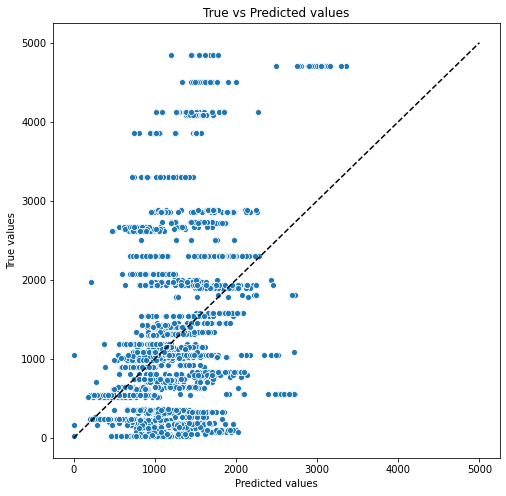

In [73]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_preds = lr_model.predict(X_train)
y_train_preds = np.clip(y_train_preds, a_min=0, a_max=5000)

evaluate_preds(y_train, y_train_preds)

R2:	0.13
RMSE:	948.51
MSE:	899671.59


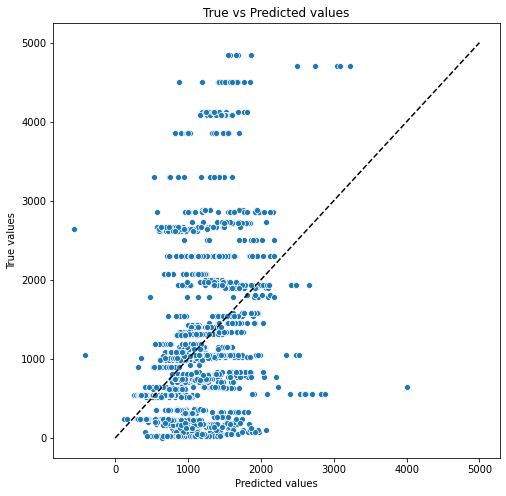

In [76]:
y_test_preds = lr_model.predict(X_test)
y_test_preds = np.clip(y_test_preds, a_min=-1000, a_max=4000)
evaluate_preds(y_test, y_test_preds)

In [51]:
y_test.to_numpy()

array([  30.,  645., 1130., ..., 4849.,  540., 3300.])

In [52]:
y_pred

array([ 573.85343661,  490.82409815, 1021.86848317, ..., 1605.2556941 ,
        491.20433189, 1376.64453794])